### TBD
#### Tutorial links
https://stackabuse.com/python-for-nlp-sentiment-analysis-with-scikit-learn/

https://www.youtube.com/watch?v=QpzMWQvxXWk


In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from textblob import TextBlob
plt.style.use('ggplot')
nltk.download('all-corpora')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('vader_lexicon')
%matplotlib inline

[nltk_data] Downloading collection 'all-corpora'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading pack

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
# read the data
# Initialize an empty DataFrame to store the data
reviews = pd.DataFrame()

# Define the file path
file_path = '/gdrive/My Drive/ADC/yelp_project/datasets/yelp_academic_dataset_review.json'

# Specify the chunk size
chunksize = 100000

# Read the file in chunks and concatenate them
for chunk in pd.read_json(file_path, lines=True, chunksize=chunksize):
    reviews = pd.concat([reviews, chunk])

# Now, 'all_data' contains the entire dataset

In [ ]:
# show the data
reviews.head(10)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15
5,JrIxlS1TzJ-iCu79ul40cQ,eUta8W_HdHMXPzLBBZhL1A,04UD14gamNjLY0IDYVhHJg,1,1,2,1,I am a long term frequent customer of this est...,2015-09-23 23:10:31
6,6AxgBCNX_PNTOxmbRSwcKQ,r3zeYsv1XFBRA4dJpL78cw,gmjsEdUsKpj9Xxu6pdjH0g,5,0,2,0,Loved this tour! I grabbed a groupon and the p...,2015-01-03 23:21:18
7,_ZeMknuYdlQcUqng_Im3yg,yfFzsLmaWF2d4Sr0UNbBgg,LHSTtnW3YHCeUkRDGyJOyw,5,2,0,0,Amazingly amazing wings and homemade bleu chee...,2015-08-07 02:29:16
8,ZKvDG2sBvHVdF5oBNUOpAQ,wSTuiTk-sKNdcFyprzZAjg,B5XSoSG3SfvQGtKEGQ1tSQ,3,1,1,0,This easter instead of going to Lopez Lake we ...,2016-03-30 22:46:33
9,pUycOfUwM8vqX7KjRRhUEA,59MxRhNVhU9MYndMkz0wtw,gebiRewfieSdtt17PTW6Zg,3,0,0,0,Had a party of 6 here for hibachi. Our waitres...,2016-07-25 07:31:06


In [ ]:
# read business data
business = pd.read_json('/gdrive/My Drive/ADC/yelp_project/datasets/yelp_academic_dataset_business.json', lines=True)

In [ ]:
# show business data
business.head(10)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
6,n_0UpQx1hsNbnPUSlodU8w,Famous Footwear,"8522 Eager Road, Dierbergs Brentwood Point",Brentwood,MO,63144,38.627695,-90.340465,2.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Sporting Goods, Fashion, Shoe Stores, Shopping...","{'Monday': '0:0-0:0', 'Tuesday': '10:0-18:0', ..."
7,qkRM_2X51Yqxk3btlwAQIg,Temple Beth-El,400 Pasadena Ave S,St. Petersburg,FL,33707,27.766590,-82.732983,3.5,5,1,None,"Synagogues, Religious Organizations","{'Monday': '9:0-17:0', 'Tuesday': '9:0-17:0', ..."
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."


In [ ]:
# join the files using business id
reviws_business = pd.merge(business, reviews, on='business_id')

In [ ]:
# show the new data
reviws_business.head(10)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,"Doctors, Traditional Chinese Medicine, Naturop...",None,9vwYDBVI3ymdqcyJ5WW2Tg,e0imecnX_9MtLnS2rUZM-A,5,3,2,1,I've had acupuncture treatments with Abby over...,2012-05-02 18:07:38
1,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,"Doctors, Traditional Chinese Medicine, Naturop...",None,OXgg1LdxHDv3CBU5-xi2lA,_Q0fdLVoTnlNkEypUvNkHA,5,1,0,0,Abby is an amazing practitioner. In a treatmen...,2013-03-01 06:11:05
2,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,"Doctors, Traditional Chinese Medicine, Naturop...",None,DG64cjud9cWB4fANskVxSw,ycUooVIDWPgXPf6niW-FWQ,4,2,0,0,I went to see Abby for some digestive issues. ...,2013-01-17 00:05:43
3,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,"Doctors, Traditional Chinese Medicine, Naturop...",None,hzvRRb40oPttxAdyr7kfow,CiwVvb7jWijWB5jkmatzKA,5,0,1,0,"Abby helped me with some longstanding issues, ...",2015-03-16 03:43:08
4,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,"Doctors, Traditional Chinese Medicine, Naturop...",None,xUkBPk-QfcW4i3MRU5TeXw,QkCbMKBktkrkOFJugHvY6w,5,0,0,0,"Recently, I referred a patient of mine with mu...",2013-03-05 18:45:07
5,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,"Doctors, Traditional Chinese Medicine, Naturop...",None,7zGoOrFQT5WylJYax1pYnA,ZCACyKwpELPtwV4Hue5pcg,5,1,0,0,Abby Rappoport helped me achieve a long lost s...,2012-08-09 20:43:27
6,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,"Doctors, Traditional Chinese Medicine, Naturop...",None,2DhY5MYiQ8oy-ZqZthYiOg,q-RkAwuq6h6unalI2CWF0Q,5,2,0,0,Abby is an absolutely amazing acupuncturist.. ...,2012-05-04 03:47:09
7,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",-WXMS4p3D9NQsAPw4YPEyw,Jks_uMtTZHqP-84wSZ3COg,5,0,0,0,I have a po box there and ea. visit I am greet...,2014-09-15 14:37:42
8,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",z7TqAKXXArEB6LH6Nfr9BQ,trf3Qcz8qvCDKXiTgjUcEg,3,1,0,1,"Bottom Line: \nClean store, Quick Service, Go...",2011-08-01 03:45:56
9,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",8Di0vZGcRLVNCZ-AWKgshA,auE6cx-AMcv2fv4SW_gnzA,5,0,0,0,I went in to ship a package to my friend for h...,2018-03-06 03:17:02


In [ ]:
# filter the data to only contain Tucson city data
tucson_data = reviws_business.loc[reviws_business['city'] == 'Tucson']

In [ ]:
# show the new Tucson data
tucson_data.head(10)

,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,review_count,...,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date
22,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,...,"Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",IOmiYoBPtQsY_fh5uA4mXg,P-NTOAMFVSDFGkhcj4GaIQ,4,1,0,0,We are fans of Target. They seem to have a li...,2017-02-19 15:11:22
23,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,...,"Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",mppZsNECpgwPGzCCNgAqpA,Dj-HuKJhpWTMlxbffWqfRQ,4,0,0,0,From birthday surprises to holiday best! this ...,2012-12-17 15:50:08
24,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,...,"Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",gXUm4c8tGItkVPdAv8hk_A,oAvO0BOHOagOI7WVGXlWSA,4,0,0,0,This is a neat store! It is also organized! Th...,2012-12-12 17:28:26
25,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,...,"Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",rdXWiBGc-c03JYy8A1XxqA,JLW2uULP_Q1KXHhToNljcQ,5,0,0,0,Can't say anything bad about target one of my ...,2015-01-07 02:25:25
26,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,...,"Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",B5zzY1avjmzWvOw5bkt9XQ,-rGU3wo4fgEnGRboYdMTjw,3,0,0,0,it is an alright Target. It's not my favorite ...,2014-11-16 04:12:02
27,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,...,"Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",my5ciGI0XclByum97KJ4Ag,oJ6oWNhA8NCOqoWveKd_Hg,5,3,3,3,Stopped by here right after lunch. My dad's fi...,2015-09-27 21:57:22
28,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,...,"Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",ptb-7Yy03TwRRXLCCMaSNA,LhHOF4H2vz9xrcfJn3pCZA,2,3,0,0,This Target misses the mark. \n\nTarget is Tar...,2008-12-14 08:41:21
29,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,...,"Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",ISMYii94eB5Fp9BXXy_u3Q,tj4f7dbf803UjDejrs7eiQ,4,0,0,0,When I feel like ditching Walmart for a more c...,2017-08-14 23:34:39
30,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,...,"Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",QPPeuDxVYoAwlVEGs2MQiw,Kp4Fc7-AM2l8Wq1zNBAFag,5,0,0,0,The pharmacy is the BEST I have ever encounter...,2011-03-18 20:22:25
31,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,...,"Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",zgGM_82BjC0wwbiqZQ8H9g,ifbY7DlrQep2hxR8WBGQbw,5,0,0,0,One of my favorite Target stores....alway clea...,2012-01-24 16:14:57


In [ ]:
# show a text review example
tucson_data['text'].values[0]

'We are fans of Target.  They seem to have a little better quality over Walmart.  This Target is easy to get to from the U of A.  When we have errand to run while we are over by the university we tend to stop by and pick up what we need here.\n\nThis Target happens to be one of the oldest and smallest in town.  That being said they tend to have a smaller selection.  The cafe now seems to be closed every time we go in.  Be careful when schools starts this place is packed.  On the plus side the restrooms are clean and the staff is friendly.'

In [ ]:
# show the shape and sample to 500
print(tucson_data.shape)
tucson_sample = tucson_data.head(500)
print(tucson_sample.shape)

(404880, 22)
(500, 22)


### EDA

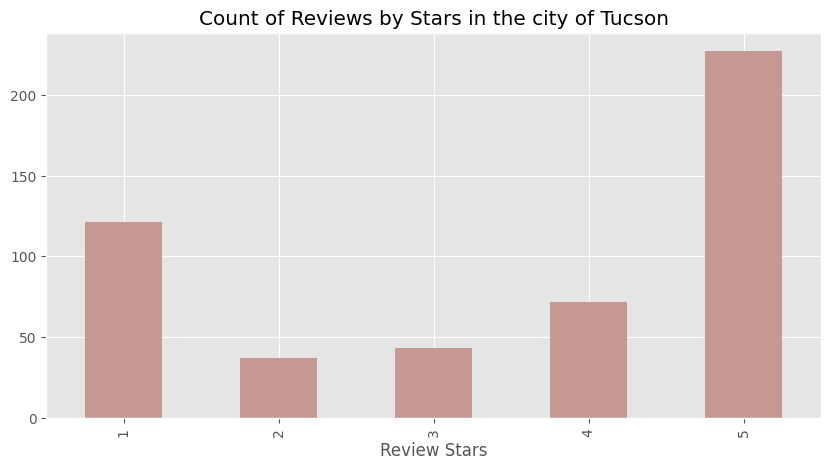

In [ ]:
# show the number of time each rating/stars occurs
ax = tucson_sample['stars_y'].value_counts().sort_index().plot(kind='bar',
          title='Count of Reviews by Stars in the city of Tucson',
          figsize=(10, 5), color='#c59992')
ax.set_xlabel('Review Stars')
plt.show()

### Starting with NLTK

Basic analysis with one example

In [ ]:
example = tucson_sample['text'].values[50]
print(example)

Pretty decent food compared to other Chinese Restaurants on this side of town. I normally order the shrimp with lobster sauce which is good, and my spouse really likes the tomato beef. If you spend over $35 you get a free chicken fried rice.


In [ ]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Pretty',
 'decent',
 'food',
 'compared',
 'to',
 'other',
 'Chinese',
 'Restaurants',
 'on',
 'this']

In [ ]:
# part of speach values
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Pretty', 'NNP'),
 ('decent', 'JJ'),
 ('food', 'NN'),
 ('compared', 'VBN'),
 ('to', 'TO'),
 ('other', 'JJ'),
 ('Chinese', 'JJ'),
 ('Restaurants', 'NNS'),
 ('on', 'IN'),
 ('this', 'DT')]

In [ ]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  Pretty/NNP
  decent/JJ
  food/NN
  compared/VBN
  to/TO
  other/JJ
  (GPE Chinese/JJ)
  Restaurants/NNS
  on/IN
  this/DT
  side/NN
  of/IN
  town/NN
  ./.
  I/PRP
  normally/RB
  order/NN
  the/DT
  shrimp/NN
  with/IN
  lobster/NN
  sauce/NN
  which/WDT
  is/VBZ
  good/JJ
  ,/,
  and/CC
  my/PRP$
  spouse/NN
  really/RB
  likes/VBZ
  the/DT
  tomato/NN
  beef/NN
  ./.
  If/IN
  you/PRP
  spend/VBP
  over/IN
  $/$
  35/CD
  you/PRP
  get/VBP
  a/DT
  free/JJ
  chicken/NN
  fried/VBD
  rice/NN
  ./.)


### Starting with Vader
Classify the sentences by Positive, Neutral, or Negative

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [ ]:
sia

In [ ]:
# example with the neg/ney/pos
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [ ]:
# example with a negative sentence
sia.polarity_scores('This is the worst thing ever.')

{'neg': 0.451, 'neu': 0.549, 'pos': 0.0, 'compound': -0.6249}

In [ ]:
# run sia on the tucson example
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'compound': 0.9099}

In [ ]:
# run the polarity score on the entire tucson sample
res = {}
for i, row in tqdm(tucson_sample.iterrows(), total=len(tucson_sample)):
    text = row['text']
    myid = row['review_id']
    res[myid] = sia.polarity_scores(text)

  0%|          | 0/500 [00:00<?, ?it/s]

In [ ]:
# show the result dictionary
res

{'IOmiYoBPtQsY_fh5uA4mXg': {'neg': 0.019,
  'neu': 0.868,
  'pos': 0.113,
  'compound': 0.8692},
 'mppZsNECpgwPGzCCNgAqpA': {'neg': 0.0,
  'neu': 0.561,
  'pos': 0.439,
  'compound': 0.855},
 'gXUm4c8tGItkVPdAv8hk_A': {'neg': 0.0,
  'neu': 0.689,
  'pos': 0.311,
  'compound': 0.7772},
 'rdXWiBGc-c03JYy8A1XxqA': {'neg': 0.0,
  'neu': 0.778,
  'pos': 0.222,
  'compound': 0.9444},
 'B5zzY1avjmzWvOw5bkt9XQ': {'neg': 0.103,
  'neu': 0.787,
  'pos': 0.11,
  'compound': 0.1482},
 'my5ciGI0XclByum97KJ4Ag': {'neg': 0.026,
  'neu': 0.745,
  'pos': 0.229,
  'compound': 0.9285},
 'ptb-7Yy03TwRRXLCCMaSNA': {'neg': 0.033,
  'neu': 0.892,
  'pos': 0.074,
  'compound': 0.4215},
 'ISMYii94eB5Fp9BXXy_u3Q': {'neg': 0.0,
  'neu': 0.783,
  'pos': 0.217,
  'compound': 0.9085},
 'QPPeuDxVYoAwlVEGs2MQiw': {'neg': 0.0,
  'neu': 0.619,
  'pos': 0.381,
  'compound': 0.9235},
 'zgGM_82BjC0wwbiqZQ8H9g': {'neg': 0.0,
  'neu': 0.403,
  'pos': 0.597,
  'compound': 0.836},
 'QLdUaJm_Murq_NCD1xI-Ng': {'neg': 0.0,
  'ne

In [ ]:
# store the results dictionary in a dataframe
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'review_id'})
vaders = vaders.merge(tucson_sample, how='left')

In [ ]:
# show vader dataframe with the sentiment score
vaders.head(10)

,review_id,neg,neu,pos,compound,business_id,name,address,city,state,...,attributes,categories,hours,user_id,stars_y,useful,funny,cool,text,date
0,IOmiYoBPtQsY_fh5uA4mXg,0.019,0.868,0.113,0.8692,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,...,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",P-NTOAMFVSDFGkhcj4GaIQ,4,1,0,0,We are fans of Target. They seem to have a li...,2017-02-19 15:11:22
1,mppZsNECpgwPGzCCNgAqpA,0.000,0.561,0.439,0.8550,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,...,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",Dj-HuKJhpWTMlxbffWqfRQ,4,0,0,0,From birthday surprises to holiday best! this ...,2012-12-17 15:50:08
2,gXUm4c8tGItkVPdAv8hk_A,0.000,0.689,0.311,0.7772,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,...,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",oAvO0BOHOagOI7WVGXlWSA,4,0,0,0,This is a neat store! It is also organized! Th...,2012-12-12 17:28:26
3,rdXWiBGc-c03JYy8A1XxqA,0.000,0.778,0.222,0.9444,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,...,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",JLW2uULP_Q1KXHhToNljcQ,5,0,0,0,Can't say anything bad about target one of my ...,2015-01-07 02:25:25
4,B5zzY1avjmzWvOw5bkt9XQ,0.103,0.787,0.110,0.1482,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,...,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",-rGU3wo4fgEnGRboYdMTjw,3,0,0,0,it is an alright Target. It's not my favorite ...,2014-11-16 04:12:02
5,my5ciGI0XclByum97KJ4Ag,0.026,0.745,0.229,0.9285,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,...,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",oJ6oWNhA8NCOqoWveKd_Hg,5,3,3,3,Stopped by here right after lunch. My dad's fi...,2015-09-27 21:57:22
6,ptb-7Yy03TwRRXLCCMaSNA,0.033,0.892,0.074,0.4215,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,...,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",LhHOF4H2vz9xrcfJn3pCZA,2,3,0,0,This Target misses the mark. \n\nTarget is Tar...,2008-12-14 08:41:21
7,ISMYii94eB5Fp9BXXy_u3Q,0.000,0.783,0.217,0.9085,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,...,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",tj4f7dbf803UjDejrs7eiQ,4,0,0,0,When I feel like ditching Walmart for a more c...,2017-08-14 23:34:39
8,QPPeuDxVYoAwlVEGs2MQiw,0.000,0.619,0.381,0.9235,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,...,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",Kp4Fc7-AM2l8Wq1zNBAFag,5,0,0,0,The pharmacy is the BEST I have ever encounter...,2011-03-18 20:22:25
9,zgGM_82BjC0wwbiqZQ8H9g,0.000,0.403,0.597,0.8360,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,...,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",ifbY7DlrQep2hxR8WBGQbw,5,0,0,0,One of my favorite Target stores....alway clea...,2012-01-24 16:14:57


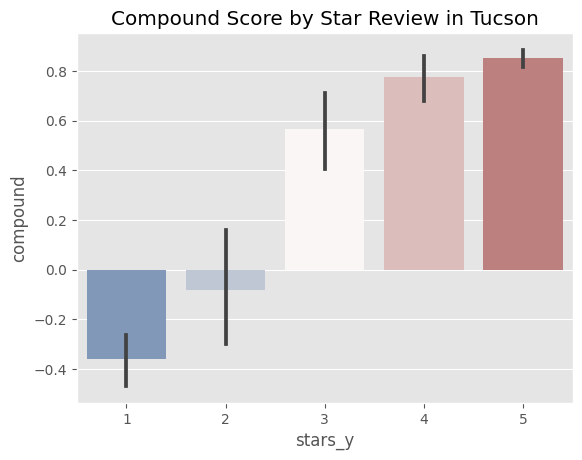

In [ ]:
# let's plot the results
ax = sns.barplot(data=vaders, x='stars_y', y='compound', palette='vlag')
ax.set_title('Compound Score by Star Review in Tucson')
plt.show()

# lower star ratings have lower compound scores!

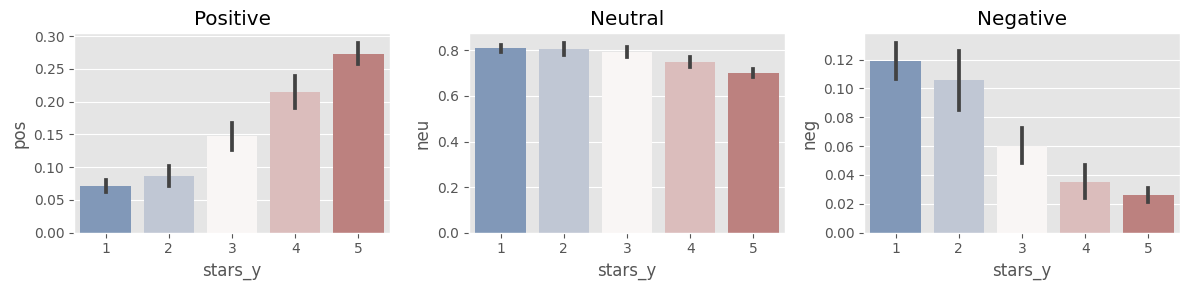

In [ ]:
#let's plot each of the sentiments in separate plots
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders, x='stars_y', y='pos', ax=axs[0], palette='vlag')
sns.barplot(data=vaders, x='stars_y', y='neu', ax=axs[1], palette='vlag')
sns.barplot(data=vaders, x='stars_y', y='neg', ax=axs[2], palette='vlag')
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

# the higher the star rating, the nicer the reviews

### Trying the Roberta pre-trained model

In [ ]:
# imports
!pip install transformers
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 36.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 50.3 MB/s eta 0:00:00


In [ ]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:
# let's see the vader results to compare with the roberta results
# VADER results on example
print(example)
sia.polarity_scores(example)

Pretty decent food compared to other Chinese Restaurants on this side of town. I normally order the shrimp with lobster sauce which is good, and my spouse really likes the tomato beef. If you spend over $35 you get a free chicken fried rice.


{'neg': 0.0, 'neu': 0.753, 'pos': 0.247, 'compound': 0.9099}

In [ ]:
# now let's see the same sentence example for roberta
# Run for Roberta Model
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0037976974, 'roberta_neu': 0.052619807, 'roberta_pos': 0.94358253}


In [ ]:
# now let's apply it to the entire tucson sample

def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
res = {}
for i, row in tqdm(tucson_sample.iterrows(), total=len(tucson_sample)):
    try:
        text = row['text']
        myid = row['review_id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/500 [00:00<?, ?it/s]

Broke for id 4zDVtU5g5TBIKC0yL-5CrA
Broke for id TAB6c0iyy3uOg9azQ793-g
Broke for id e-rmYYjo4lmSS8m7Asgwfw
Broke for id 2jUwj97uw5cQQGKJRbhG6g
Broke for id KG0QsFGwAW1qMa3f5w-Gvw
Broke for id mG3J_X6dOEzWm8SBTzJIkw
Broke for id UHP7KFy3jqkTlhTd9BiX8g
Broke for id Ly5dVZhYP9rIp8hGuD_low


###Note
when it breaks, it means it had difficulties running through the Roberta model

In [ ]:
results_tucson = pd.DataFrame(res).T
results_tucson = results_tucson.reset_index().rename(columns={'index': 'review_id'})
results_tucson = results_tucson.merge(tucson_sample, how='left')

In [83]:
# show the new dataframe
# it has the vader and roberta results!
results_tucson.head(10)

,review_id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,business_id,name,...,attributes,categories,hours,user_id,stars_y,useful,funny,cool,text,date
0,IOmiYoBPtQsY_fh5uA4mXg,0.019,0.868,0.113,0.8692,0.028860,0.206291,0.764848,tUFrWirKiKi_TAnsVWINQQ,Target,...,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",P-NTOAMFVSDFGkhcj4GaIQ,4,1,0,0,We are fans of Target. They seem to have a li...,2017-02-19 15:11:22
1,mppZsNECpgwPGzCCNgAqpA,0.000,0.561,0.439,0.8550,0.002325,0.020835,0.976840,tUFrWirKiKi_TAnsVWINQQ,Target,...,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",Dj-HuKJhpWTMlxbffWqfRQ,4,0,0,0,From birthday surprises to holiday best! this ...,2012-12-17 15:50:08
2,gXUm4c8tGItkVPdAv8hk_A,0.000,0.689,0.311,0.7772,0.001324,0.011691,0.986985,tUFrWirKiKi_TAnsVWINQQ,Target,...,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",oAvO0BOHOagOI7WVGXlWSA,4,0,0,0,This is a neat store! It is also organized! Th...,2012-12-12 17:28:26
3,rdXWiBGc-c03JYy8A1XxqA,0.000,0.778,0.222,0.9444,0.003096,0.012402,0.984503,tUFrWirKiKi_TAnsVWINQQ,Target,...,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",JLW2uULP_Q1KXHhToNljcQ,5,0,0,0,Can't say anything bad about target one of my ...,2015-01-07 02:25:25
4,B5zzY1avjmzWvOw5bkt9XQ,0.103,0.787,0.110,0.1482,0.176880,0.416296,0.406824,tUFrWirKiKi_TAnsVWINQQ,Target,...,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",-rGU3wo4fgEnGRboYdMTjw,3,0,0,0,it is an alright Target. It's not my favorite ...,2014-11-16 04:12:02
5,my5ciGI0XclByum97KJ4Ag,0.026,0.745,0.229,0.9285,0.001698,0.022344,0.975958,tUFrWirKiKi_TAnsVWINQQ,Target,...,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",oJ6oWNhA8NCOqoWveKd_Hg,5,3,3,3,Stopped by here right after lunch. My dad's fi...,2015-09-27 21:57:22
6,ptb-7Yy03TwRRXLCCMaSNA,0.033,0.892,0.074,0.4215,0.653497,0.294201,0.052302,tUFrWirKiKi_TAnsVWINQQ,Target,...,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",LhHOF4H2vz9xrcfJn3pCZA,2,3,0,0,This Target misses the mark. \n\nTarget is Tar...,2008-12-14 08:41:21
7,ISMYii94eB5Fp9BXXy_u3Q,0.000,0.783,0.217,0.9085,0.002417,0.018930,0.978654,tUFrWirKiKi_TAnsVWINQQ,Target,...,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",tj4f7dbf803UjDejrs7eiQ,4,0,0,0,When I feel like ditching Walmart for a more c...,2017-08-14 23:34:39
8,QPPeuDxVYoAwlVEGs2MQiw,0.000,0.619,0.381,0.9235,0.004800,0.020193,0.975007,tUFrWirKiKi_TAnsVWINQQ,Target,...,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",Kp4Fc7-AM2l8Wq1zNBAFag,5,0,0,0,The pharmacy is the BEST I have ever encounter...,2011-03-18 20:22:25
9,zgGM_82BjC0wwbiqZQ8H9g,0.000,0.403,0.597,0.8360,0.001202,0.011726,0.987073,tUFrWirKiKi_TAnsVWINQQ,Target,...,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",ifbY7DlrQep2hxR8WBGQbw,5,0,0,0,One of my favorite Target stores....alway clea...,2012-01-24 16:14:57


### Compare Vader and Roberta

In [ ]:
# show the columns
results_tucson.columns

Index(['review_id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'business_id', 'name',
       'address', 'city', 'state', 'postal_code', 'latitude', 'longitude',
       'stars_x', 'review_count', 'is_open', 'attributes', 'categories',
       'hours', 'user_id', 'stars_y', 'useful', 'funny', 'cool', 'text',
       'date'],
      dtype='object')

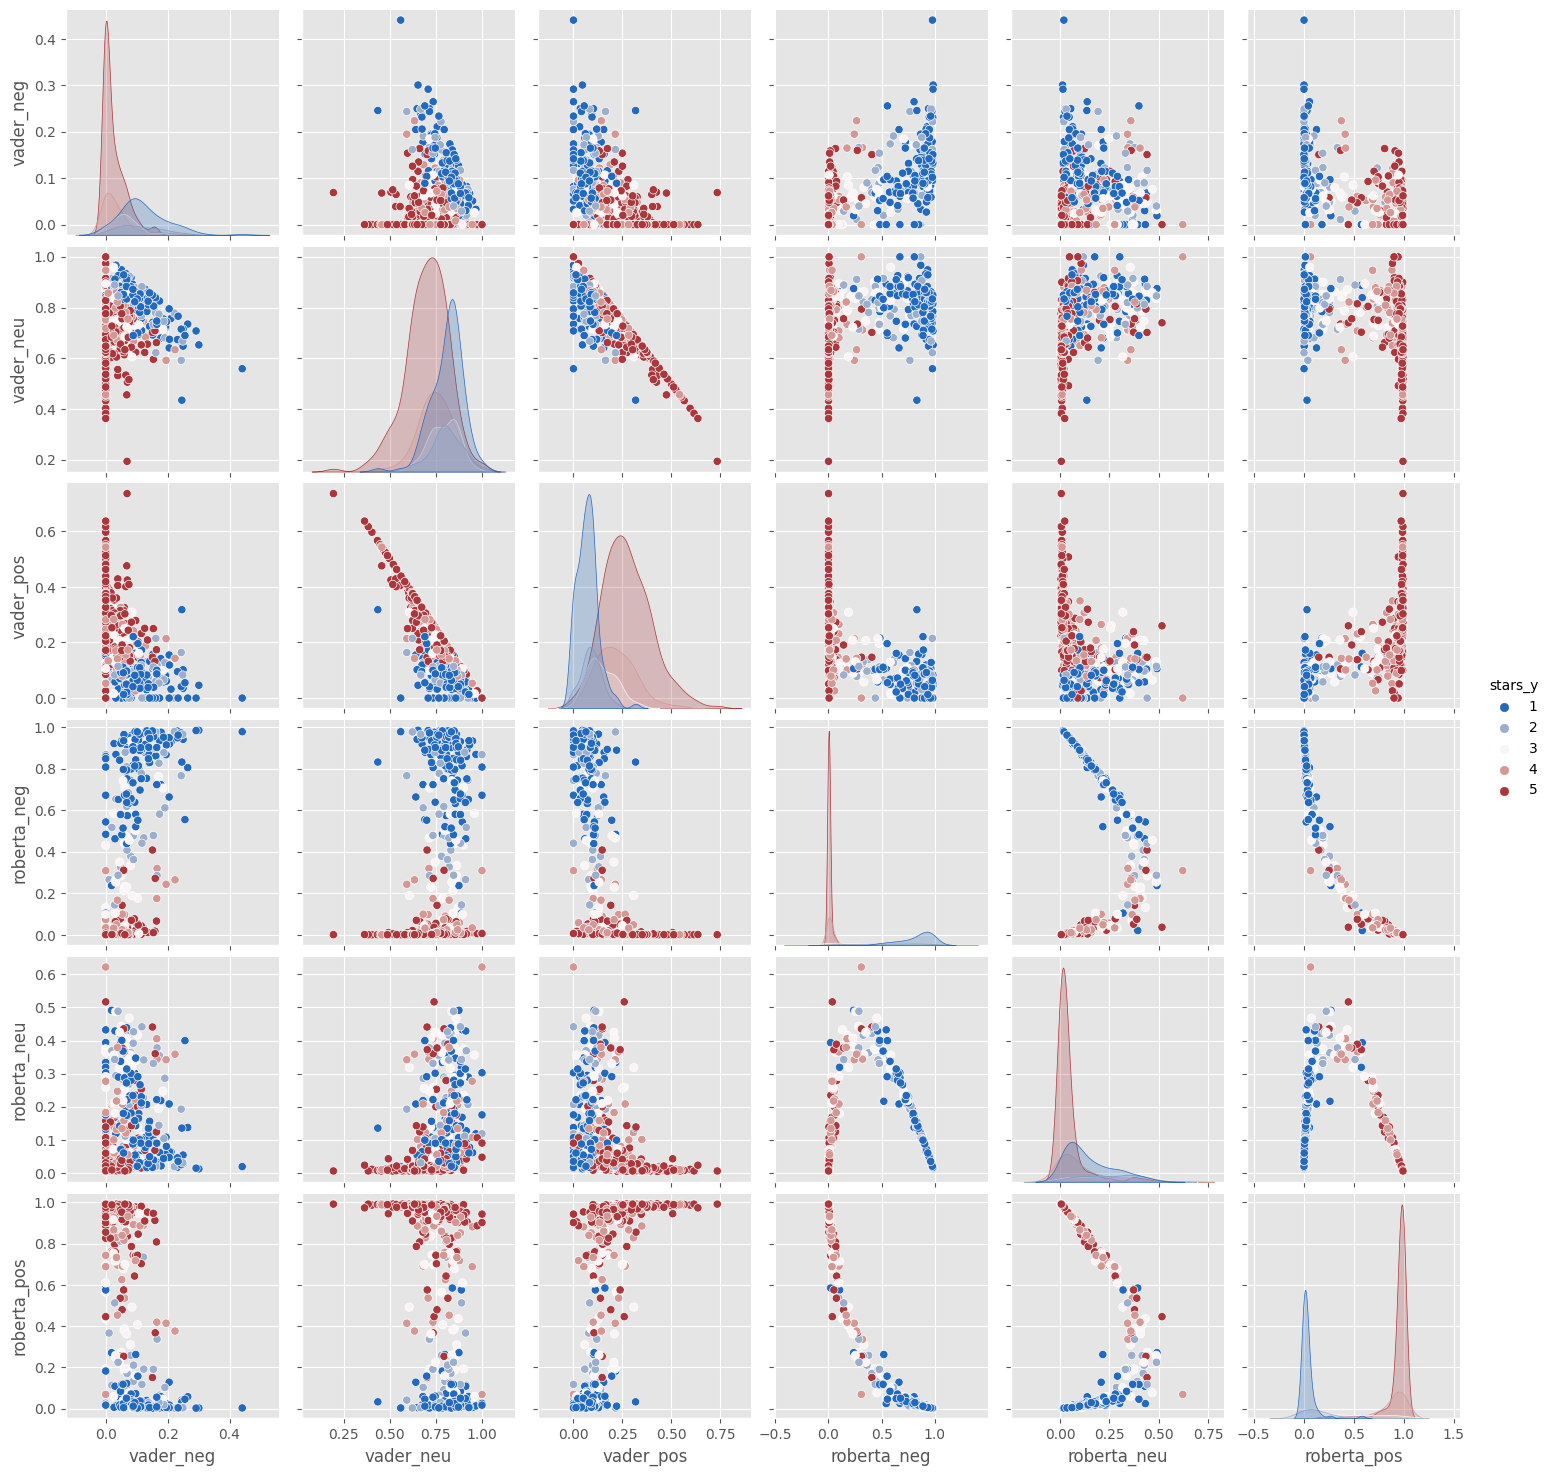

In [84]:
# plot the comparison
sns.pairplot(data=results_tucson,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='stars_y',
            palette='vlag')
plt.show()